<a href="https://colab.research.google.com/github/Madhulata1/Feature_engineering_real_estate_analytics/blob/main/fetureengineeringregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [3]:
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv("PEP1.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
data.shape

(1460, 81)

In [8]:
data.columns[data.isnull().any()].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
for i in data.columns:
  print(data[i].unique())
  print('-'*40)
  print('-'*20)

[   1    2    3 ... 1458 1459 1460]
----------------------------------------
--------------------
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
----------------------------------------
--------------------
['RL' 'RM' 'C (all)' 'FV' 'RH']
----------------------------------------
--------------------
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
----------------------------------------
--------------------
[ 8450  9600 11250 ... 17217 13175  9717]
----------------

In [10]:
numerics = ['int16','int32','int64','float16','float32','float64']
data_numeric = data.select_dtypes(include=numerics)
data_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
data_category = data.select_dtypes(exclude=numerics)
data_category

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [13]:
data.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
data.catergory = data.select_dtypes(include=['object'])
data_category

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
data_numeric = data.select_dtypes(include = ['int16','int32','int64','float16','float32','float64'])
data_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [17]:
data_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
data_null = data_numeric.isnull().sum()
data_null

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [19]:
data_numeric['LotFrontage'].fillna(data_numeric['LotFrontage'].mean(), inplace=True)


In [20]:
data_numeric.isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchebvGr        0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [21]:
data_numeric['MasVnrArea'].fillna(data_numeric['MasVnrArea'].mean(), inplace=True)
data_numeric['GarageYrBlt'].fillna(data_numeric['GarageYrBlt'].mean(),inplace=True)
data_numeric.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [22]:
data_skew = data_numeric.skew()
data_skew

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

<Axes: ylabel='Density'>

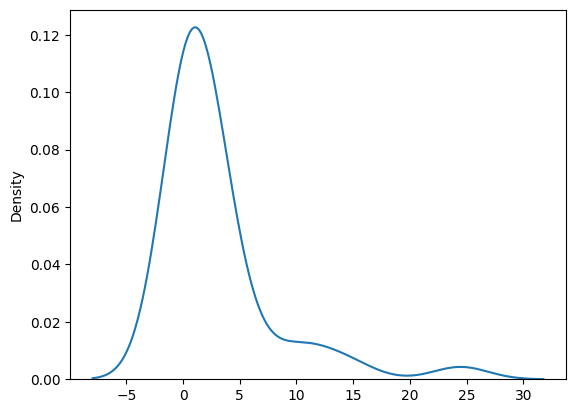

In [23]:
sns.distplot(x=data_skew, hist=False)

In [24]:
data_numcorr = data_numeric.corr()
data_numcorr
data_numcorr.style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchebvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0

In [25]:
# data_numeric['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']

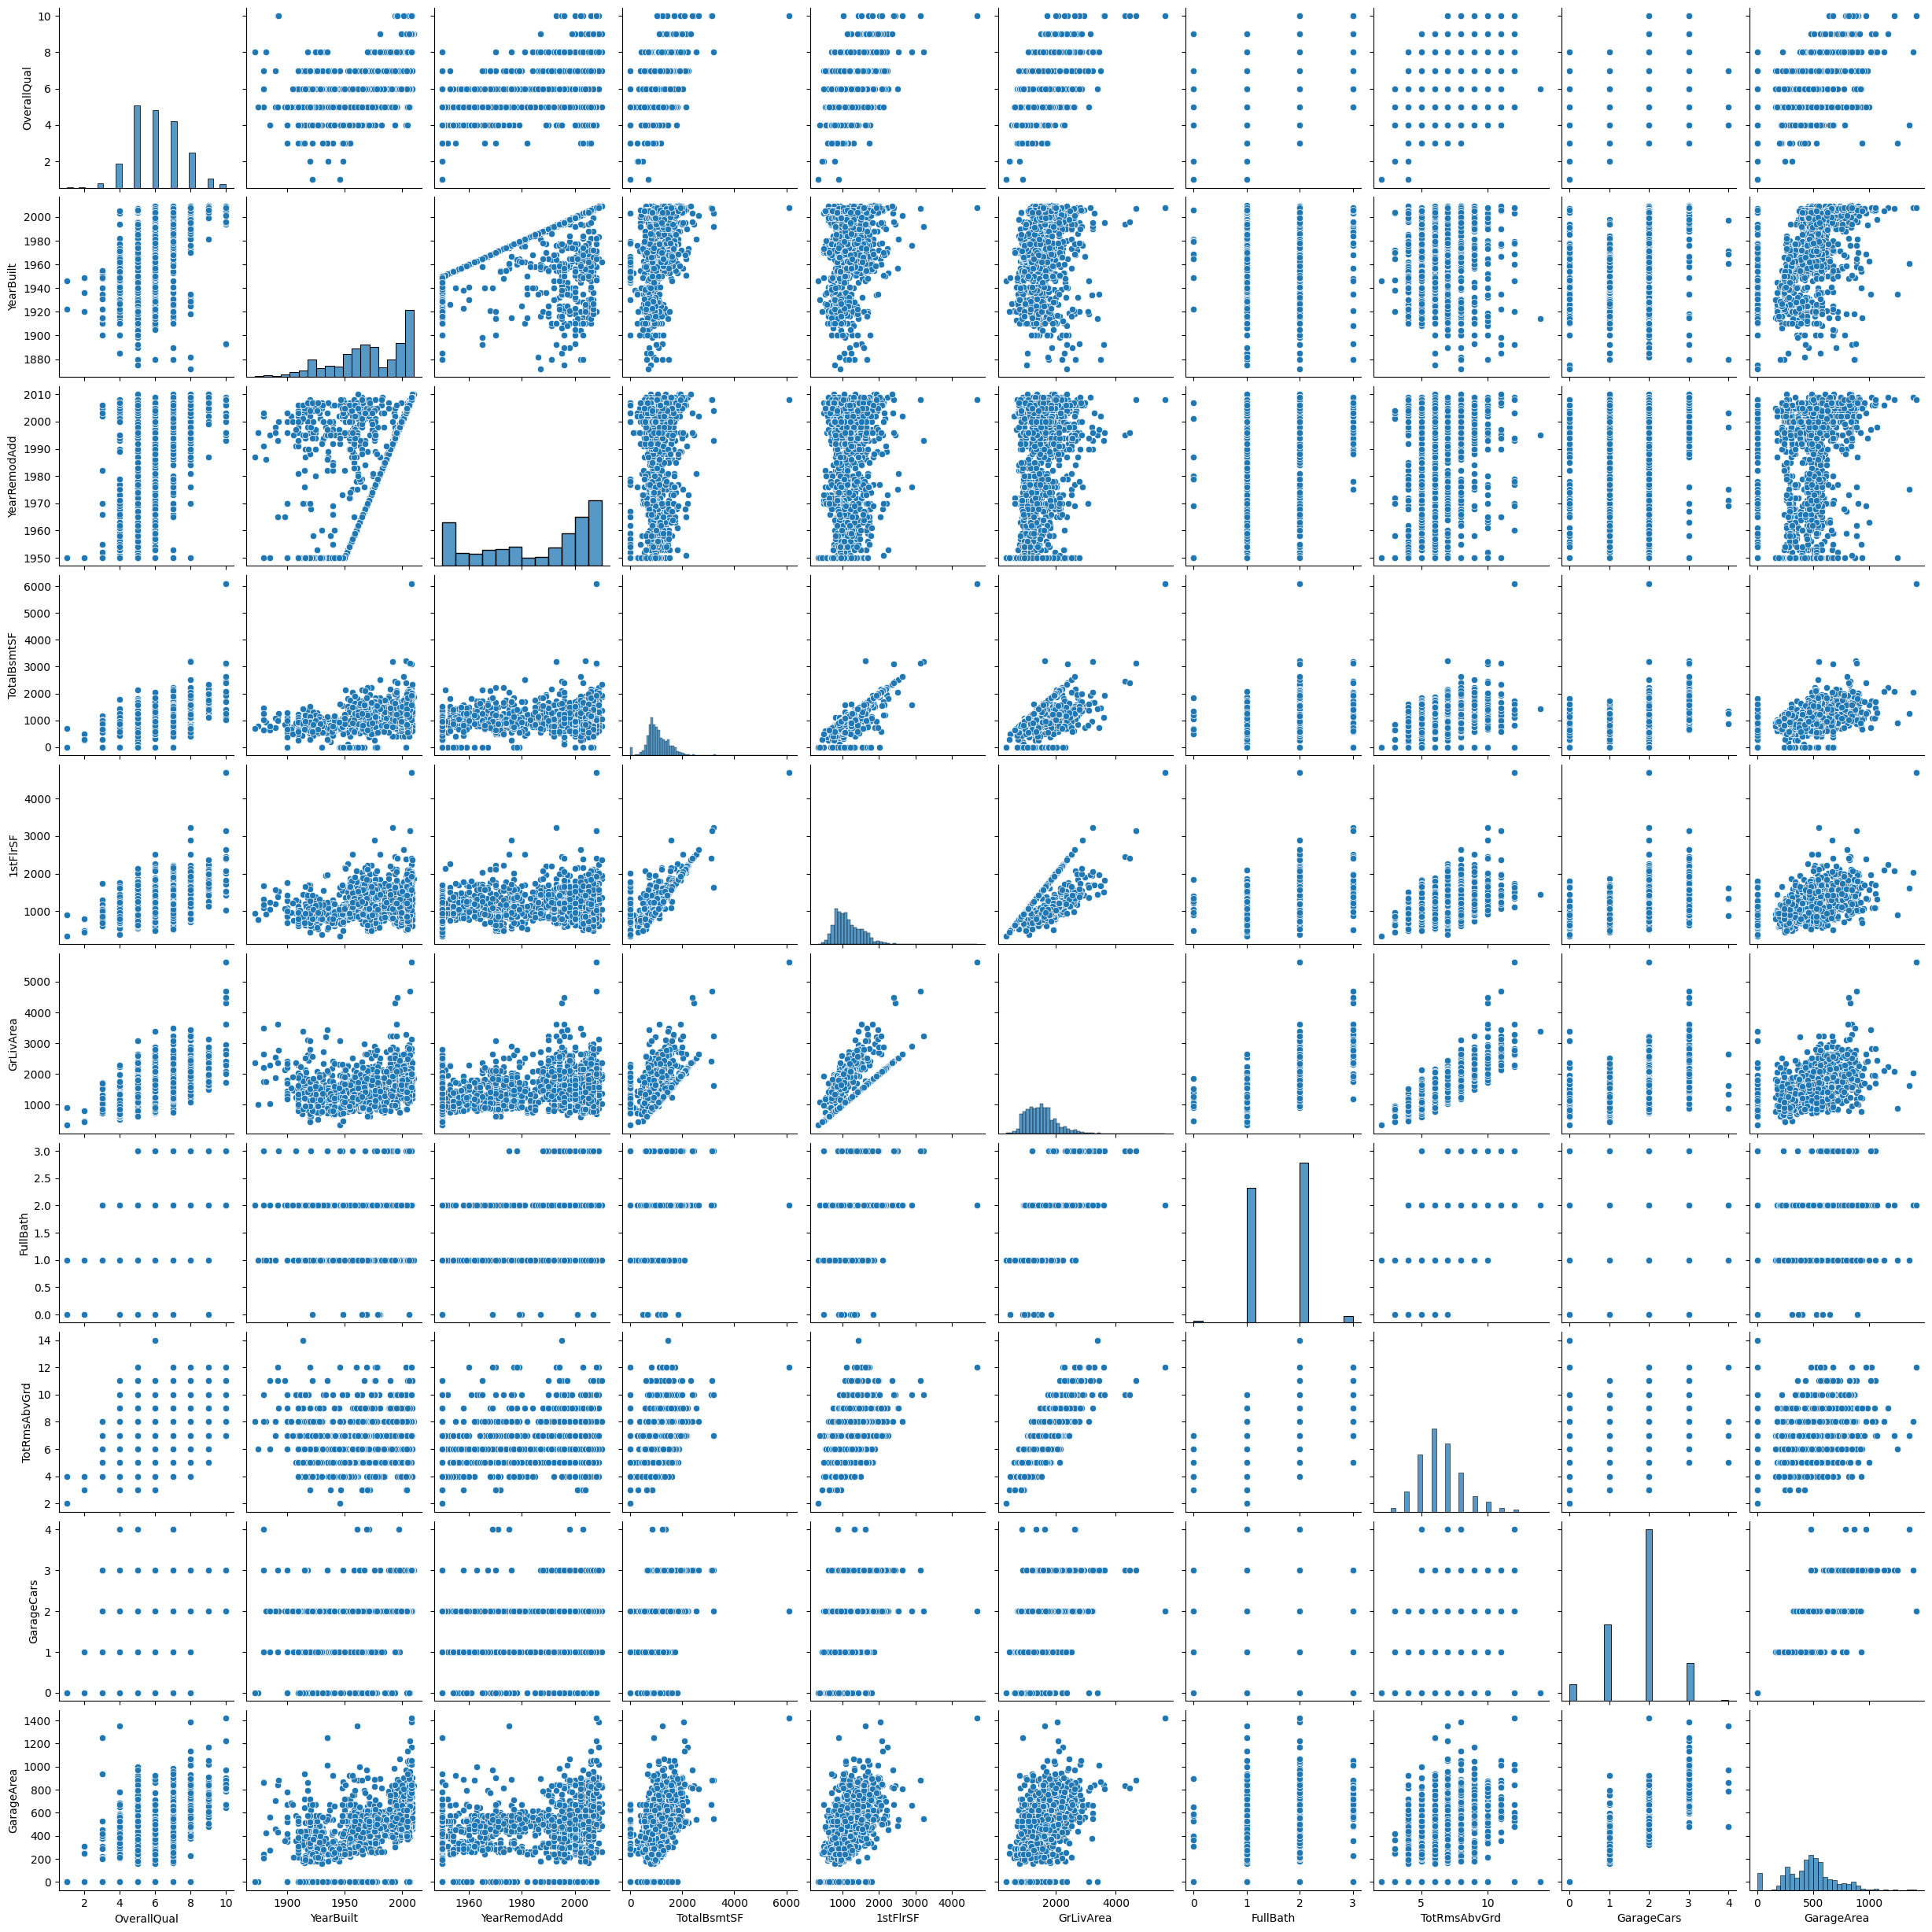

In [26]:
sns.pairplot(data= data_numeric, vars=['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'])

In [27]:
data_numeric_new = data_numeric[['OverallQual', 'YearBuilt','TotalBsmtSF','GrLivArea','FullBath','GarageCars','SalePrice']]

In [28]:
data_numeric_new

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500
2,7,2001,920,1786,2,2,223500
3,7,1915,756,1717,1,3,140000
4,8,2000,1145,2198,2,3,250000
...,...,...,...,...,...,...,...
1455,6,1999,953,1647,2,2,175000
1456,6,1978,1542,2073,2,2,210000
1457,7,1941,1152,2340,2,1,266500
1458,5,1950,1078,1078,1,1,142125


In [29]:
data_category

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [30]:
data_category.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [31]:
data_category = data_category.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [32]:
data_category.dropna(inplace=True)

In [33]:
data_category.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [34]:
data_category['SalePrice'] = data['SalePrice']
data_category


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125


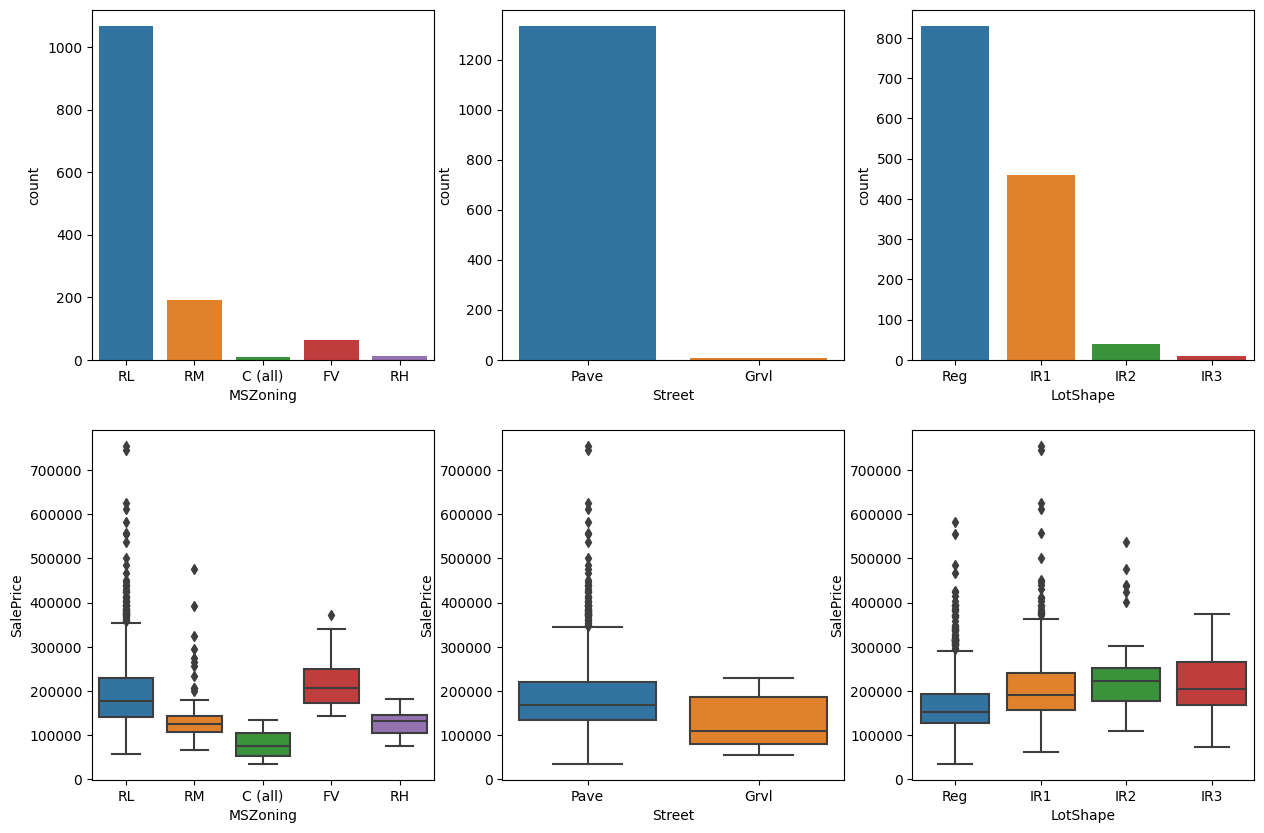

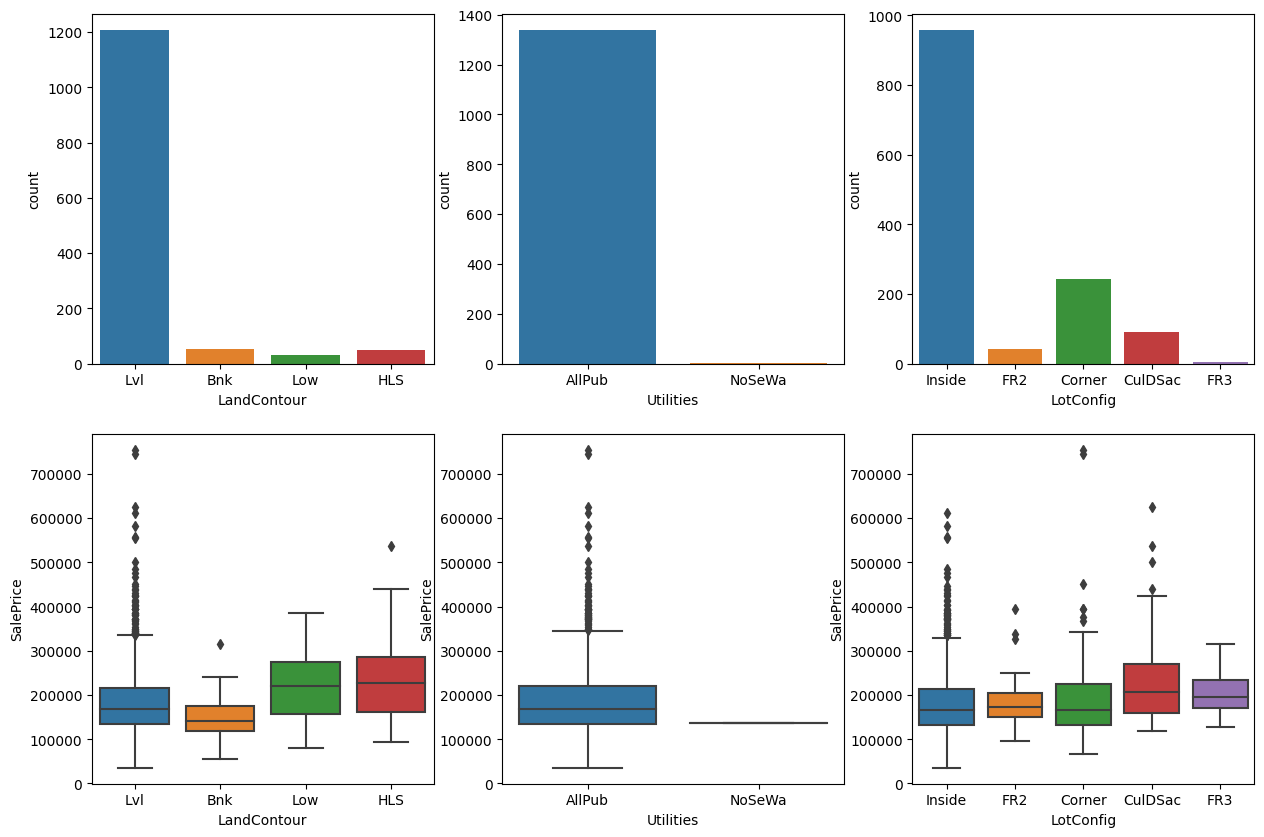

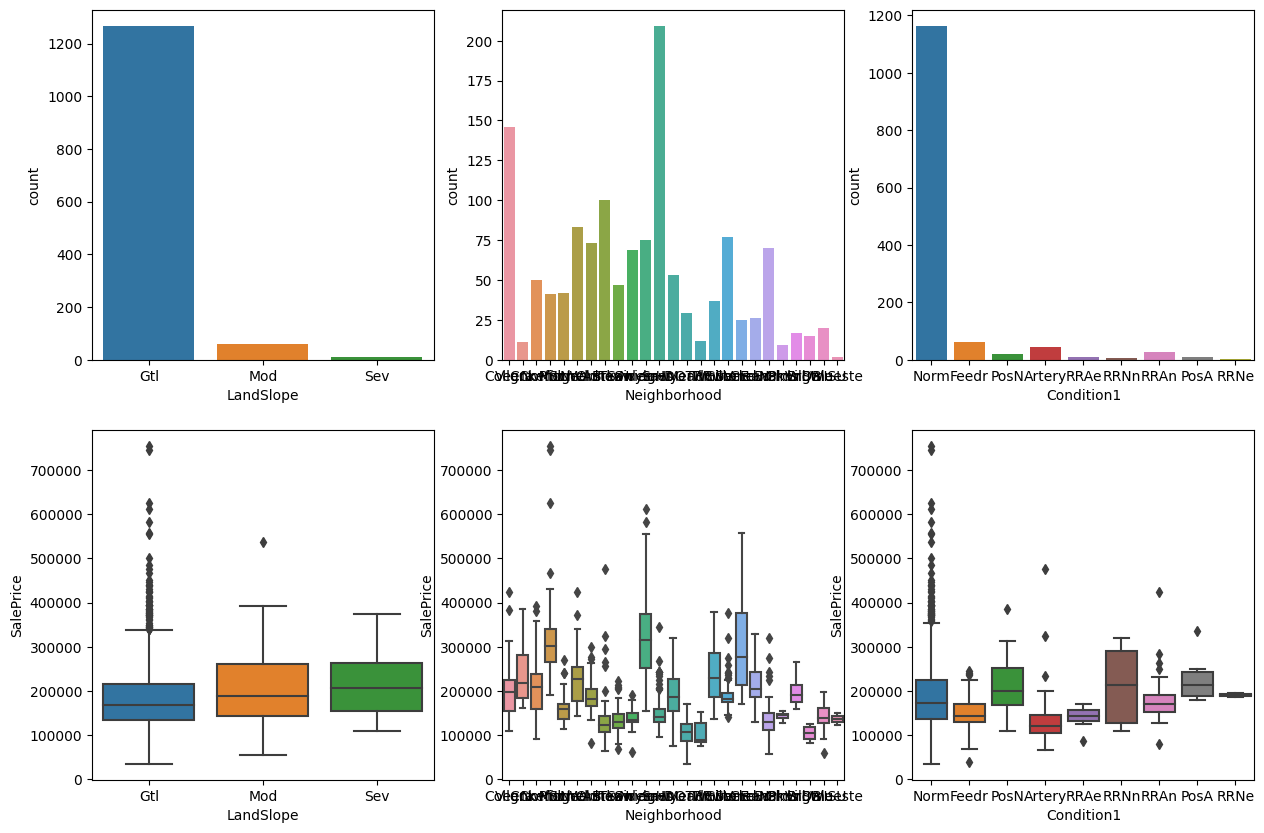

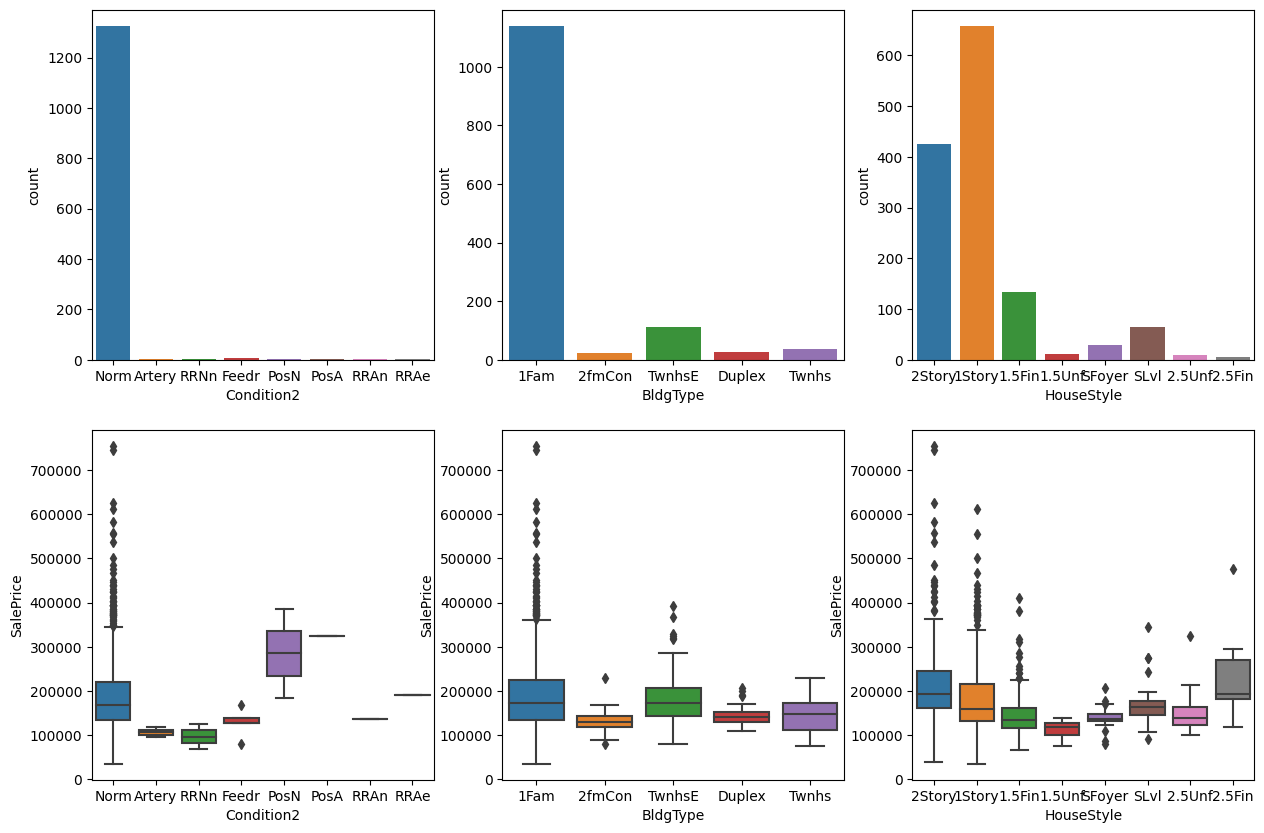

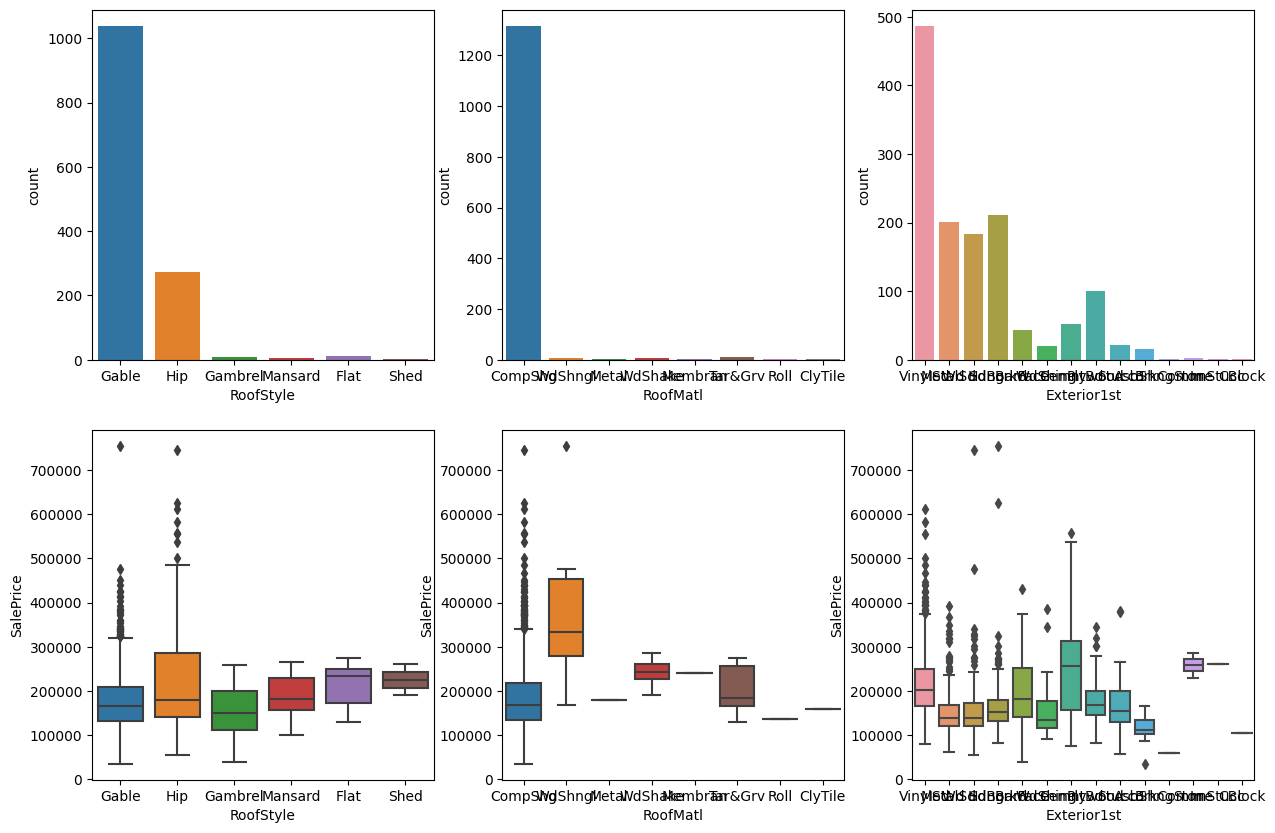

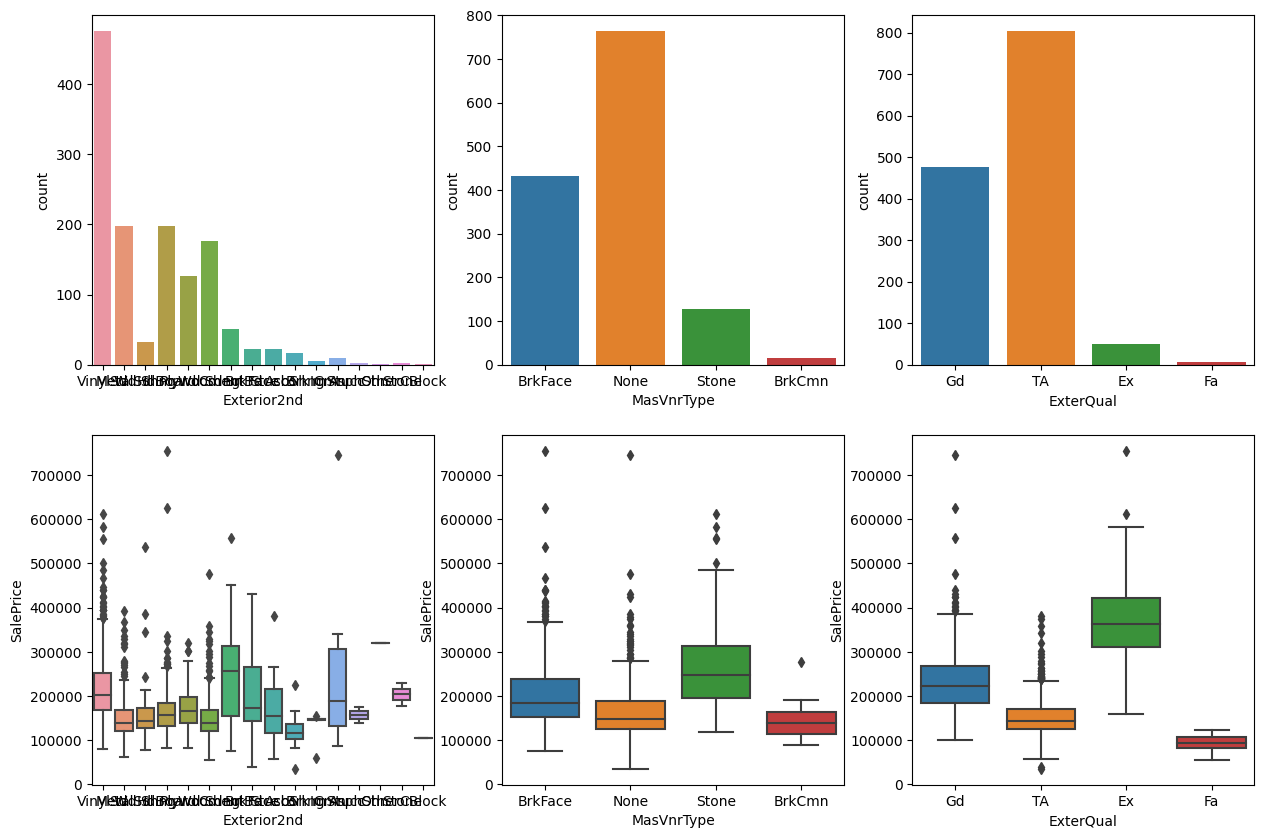

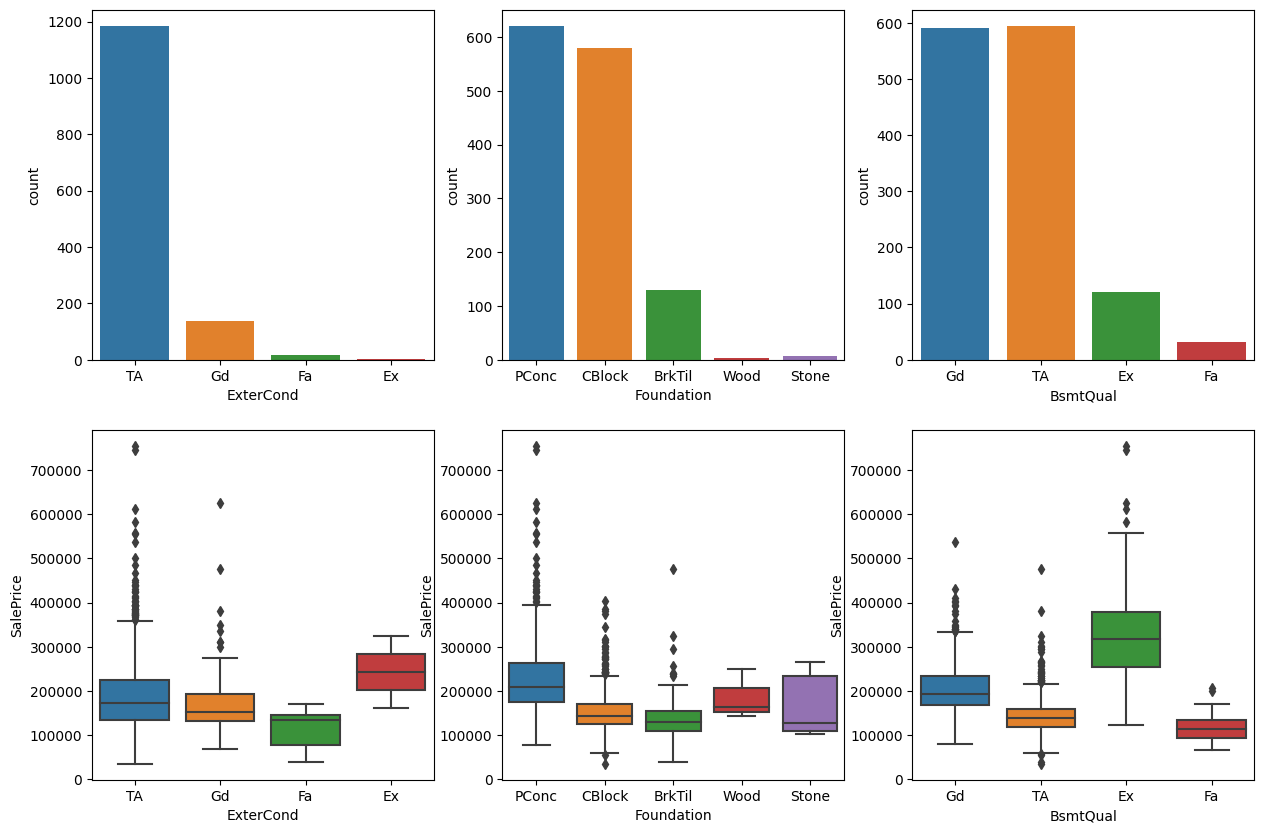

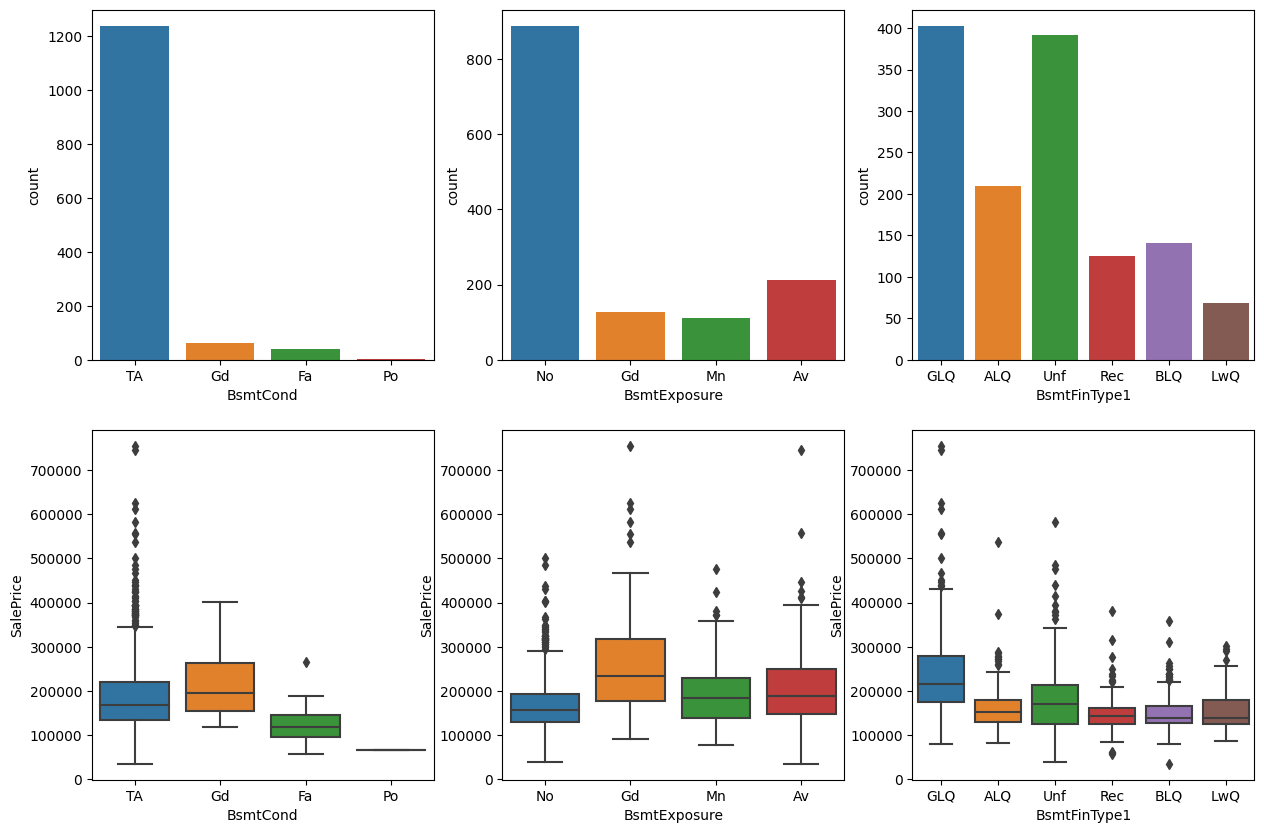

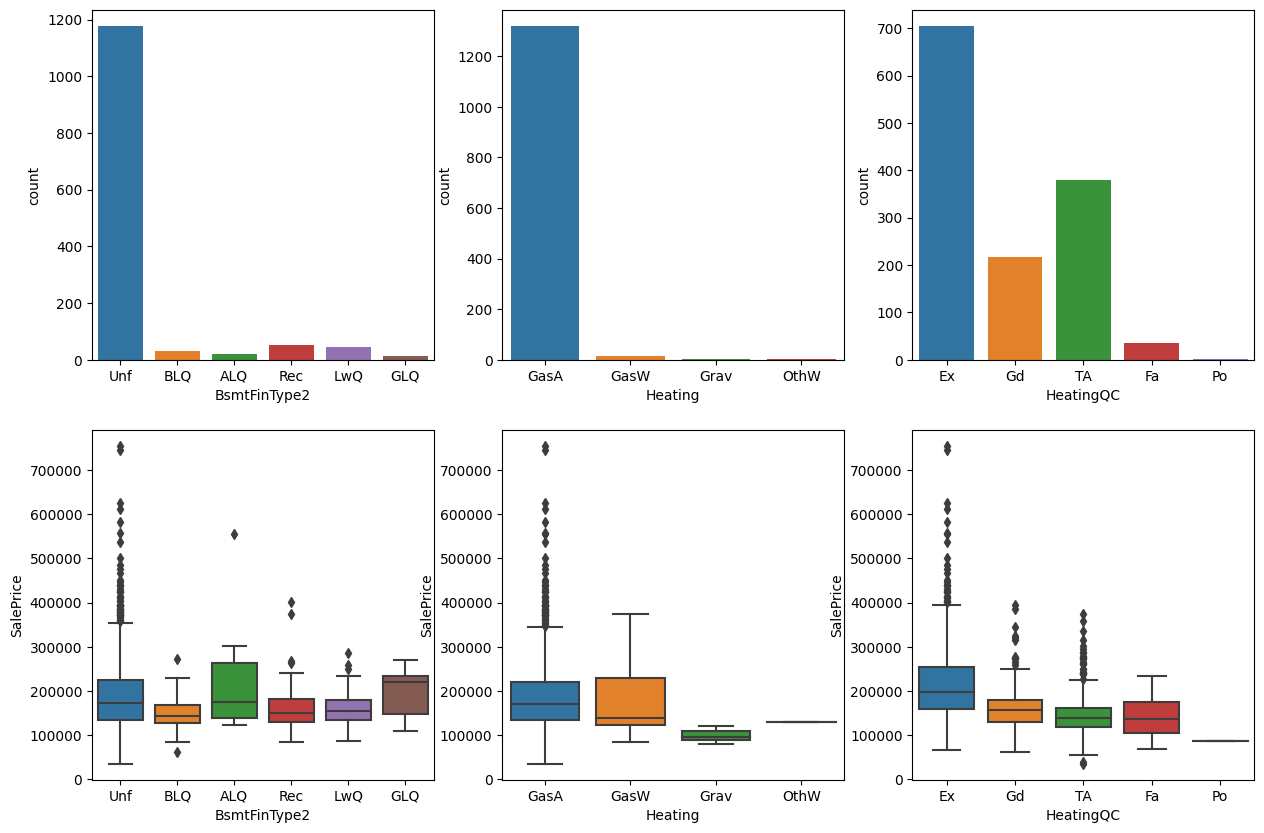

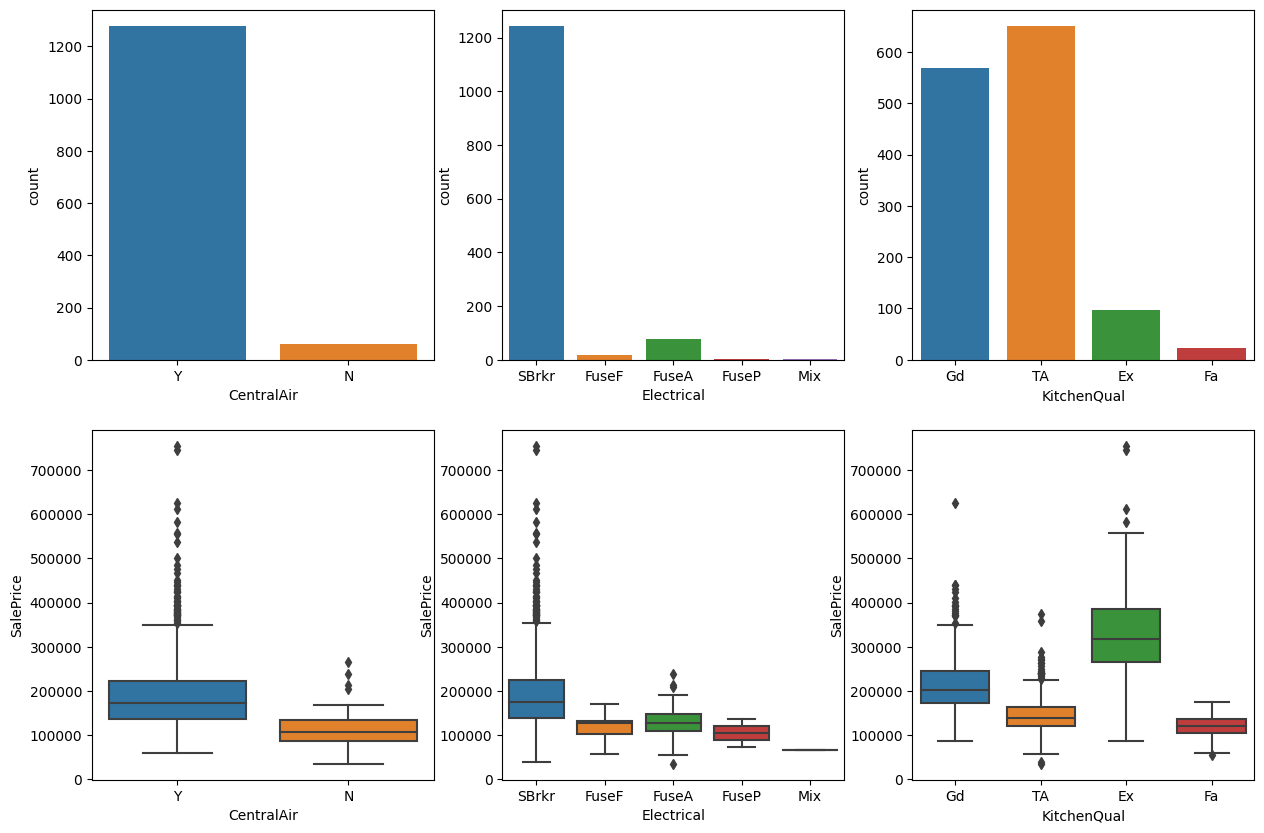

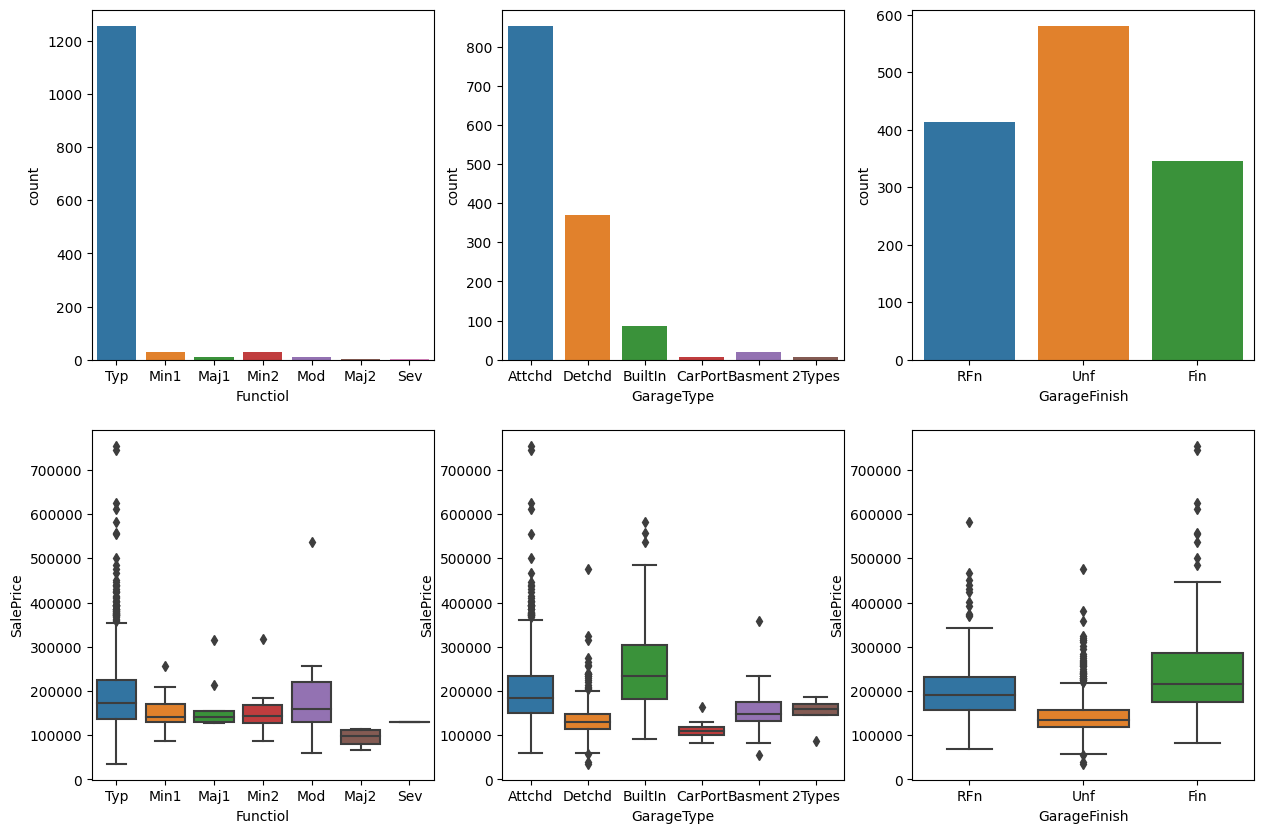

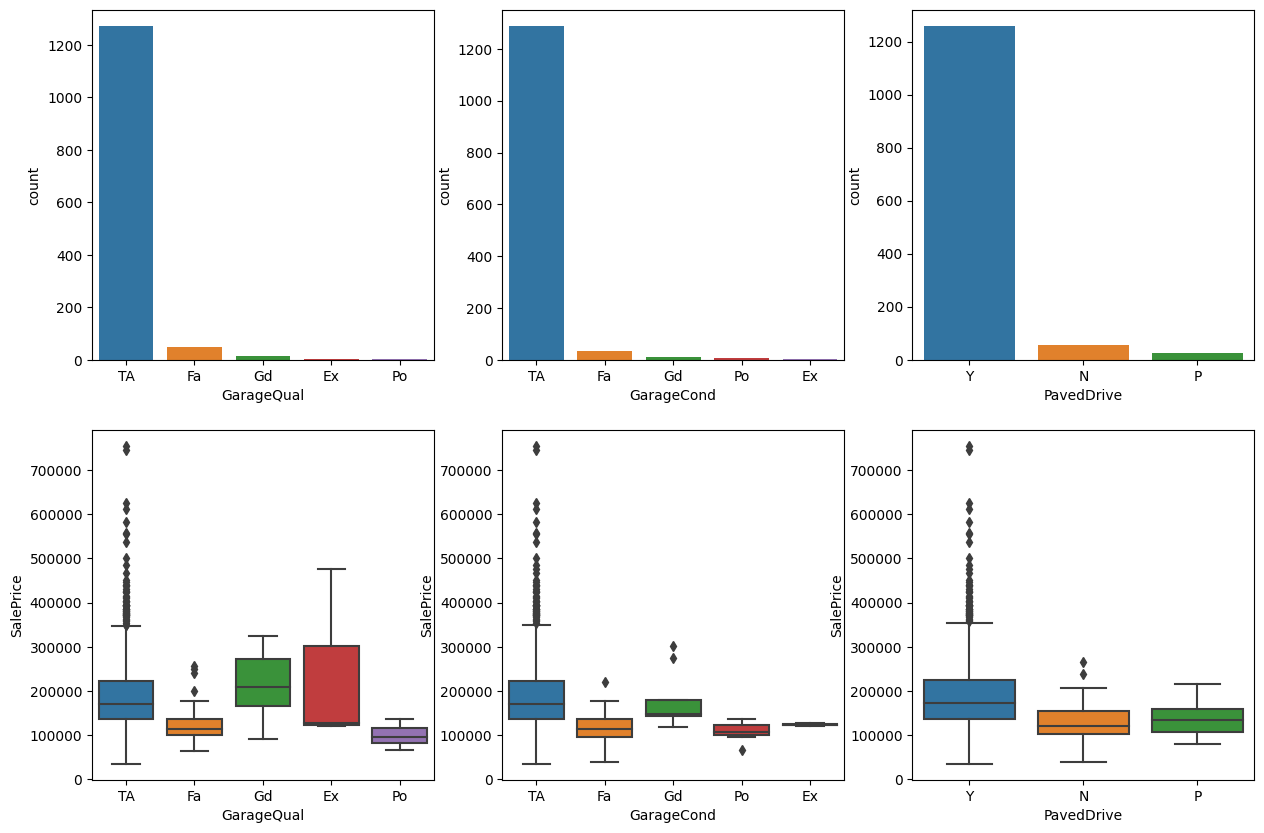

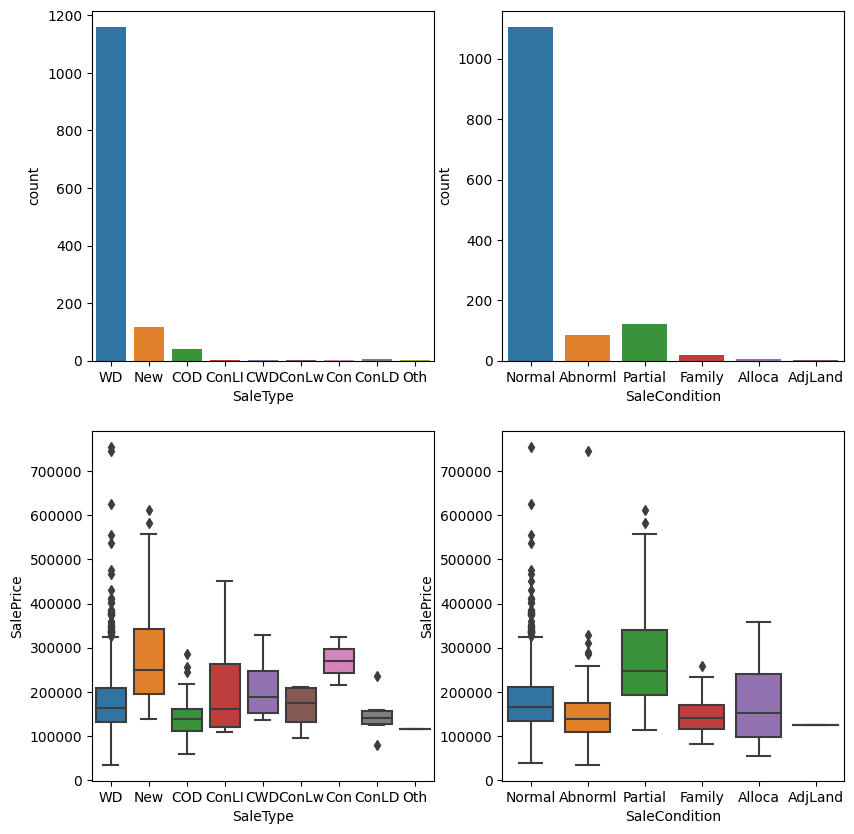

<Figure size 1500x1000 with 0 Axes>

In [35]:
i=1
fig = plt.figure(figsize= (15,10))
for c in list(data_category.columns):
  if i<=3:
    if c!= 'SalePrice':
      ax1 = plt.subplot(2,3,i)
      sns.countplot(data = data_category, x=c, ax=ax1)
      ax2 = fig.add_subplot(2,3,i+3)
      sns.boxplot(data = data_category, x=c, y='SalePrice', ax=ax2)
  i+=1
  if i==4:
    fig = plt.figure(figsize = (15,10))
    i=1


In [39]:
class ChiSquare:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None

        self.dfObserved = None
        self.dfExpected = None

#Function to print the results of p-value and chi-square test
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
#Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)

        self.dfObserved = pd.crosstab(Y,X)
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof

        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)

        self._print_chisquare_result(colX,alpha)


#Initializing ChiSquare Class
cT = ChiSquare(data_category)
#Perform Feature Selection
testColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','SalePrice']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" )

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is NOT an important predictor. (Discard LotConfig from model)
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is IMPORTANT for Prediction
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
MasVnrT

In [41]:
data_category = data_category[['MSZoning','Street','LotShape','Neighborhood','Condition2','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','CentralAir','Electrical','KitchenQual','GarageType','GarageFinish','GarageQual','SaleType','SaleCondition','SalePrice']]
data_category

,MSZoning,Street,LotShape,Neighborhood,Condition2,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,No,Y,SBrkr,Gd,Attchd,RFn,TA,WD,Normal,208500
1,RL,Pave,Reg,Veenker,Norm,None,TA,CBlock,Gd,TA,Gd,Y,SBrkr,TA,Attchd,RFn,TA,WD,Normal,181500
2,RL,Pave,IR1,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,Mn,Y,SBrkr,Gd,Attchd,RFn,TA,WD,Normal,223500
3,RL,Pave,IR1,Crawfor,Norm,None,TA,BrkTil,TA,Gd,No,Y,SBrkr,Gd,Detchd,Unf,TA,WD,Abnorml,140000
4,RL,Pave,IR1,NoRidge,Norm,BrkFace,Gd,PConc,Gd,TA,Av,Y,SBrkr,Gd,Attchd,RFn,TA,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Gilbert,Norm,None,TA,PConc,Gd,TA,No,Y,SBrkr,TA,Attchd,RFn,TA,WD,Normal,175000
1456,RL,Pave,Reg,NWAmes,Norm,Stone,TA,CBlock,Gd,TA,No,Y,SBrkr,TA,Attchd,Unf,TA,WD,Normal,210000
1457,RL,Pave,Reg,Crawfor,Norm,None,Ex,Stone,TA,Gd,No,Y,SBrkr,Gd,Attchd,RFn,TA,WD,Normal,266500
1458,RL,Pave,Reg,mes,Norm,None,TA,CBlock,TA,TA,Mn,Y,FuseA,Gd,Attchd,Unf,TA,WD,Normal,142125


In [72]:
data_new = pd.merge(data_category , data_numeric , how="outer", on=["SalePrice"])
data_new

,MSZoning,Street,LotShape,Neighborhood,Condition2,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Veenker,Norm,None,TA,CBlock,Gd,TA,...,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,IR1,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,...,608,0,42,0,0,0,0,0,9,2008
3,RL,Pave,IR1,CollgCr,Norm,BrkFace,Gd,PConc,Gd,TA,...,528,0,312,0,0,0,0,0,5,2009
4,RL,Pave,Reg,BrkSide,Norm,None,TA,CBlock,TA,TA,...,608,0,42,0,0,0,0,0,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,850,216,229,0,0,0,0,0,9,2006
6379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,96,0,0,0,0,0,7,2009
6380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287,0,0,0,0,0,0,0,7,2008
6381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,20,0,0,0,0,0,3,2006


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data_category.copy()
for i in data_category:
  if i !='SalePrice':
    data_cat[i] = le.fit_transform(data_category[i])

In [77]:
data_cat.shape

(1338, 20)

In [78]:
data_category.shape

(1338, 20)

In [83]:
data_new = pd.merge(data_cat , data_numeric , how="outer", on=["SalePrice"])
data_new

,MSZoning,Street,LotShape,Neighborhood,Condition2,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3.0,1.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,...,548,0,61,0,0,0,0,0,2,2008
1,3.0,1.0,3.0,23.0,2.0,2.0,3.0,1.0,2.0,3.0,...,460,298,0,0,0,0,0,0,5,2007
2,3.0,1.0,0.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,...,608,0,42,0,0,0,0,0,9,2008
3,3.0,1.0,0.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,...,528,0,312,0,0,0,0,0,5,2009
4,3.0,1.0,3.0,3.0,2.0,2.0,3.0,1.0,3.0,3.0,...,608,0,42,0,0,0,0,0,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,850,216,229,0,0,0,0,0,9,2006
6379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,96,0,0,0,0,0,7,2009
6380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287,0,0,0,0,0,0,0,7,2008
6381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,20,0,0,0,0,0,3,2006


In [84]:
data_new.shape

(6383, 57)

In [85]:
data_new.isnull().sum()

MSZoning         47
Street           47
LotShape         47
Neighborhood     47
Condition2       47
MasVnrType       47
ExterQual        47
Foundation       47
BsmtQual         47
BsmtCond         47
BsmtExposure     47
CentralAir       47
Electrical       47
KitchenQual      47
GarageType       47
GarageFinish     47
GarageQual       47
SaleType         47
SaleCondition    47
SalePrice         0
Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchebvGr        0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0


In [86]:
data_new.dropna(inplace=True)

In [87]:
data_new.shape

(6336, 57)

In [88]:
data_new.isnull().sum()

MSZoning         0
Street           0
LotShape         0
Neighborhood     0
Condition2       0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
CentralAir       0
Electrical       0
KitchenQual      0
GarageType       0
GarageFinish     0
GarageQual       0
SaleType         0
SaleCondition    0
SalePrice        0
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch 

In [89]:
# Train - Test Split
from sklearn.model_selection import train_test_split

In [90]:
df_train, df_test = train_test_split(data_new, train_size = 0.7, random_state = 100) # test_size=0.3

In [91]:
df_train.shape, df_test.shape

((4435, 57), (1901, 57))

In [93]:
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice',axis=1)

In [94]:
y_test = df_test['SalePrice']
X_test = df_test.drop('SalePrice',axis=1)

In [95]:
## Statsmodel Library for Linear Regression

In [96]:
#Importing the statsmodel library
# import statsmodels.api as sm
from statsmodels.api import OLS

In [98]:
#Applying linear regression
model1 = OLS(y_train, X_train).fit()

In [99]:
#Finding the summary
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              3736.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):                        0.00
Time:                        14:25:08   Log-Likelihood:                         -51270.
No. Observations:                4435   AIC:                                  1.026e+05
Df Residuals:                    4381   BIC:                                  1.030e+05
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [100]:
#Prediction and evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_test_pred= model1.predict(X_test)

In [106]:
print(y_test_pred[:10])

5438    169430.889140
2071    149251.359851
1383    351848.514556
5608    281573.692791
3905    111287.123657
4193    162755.554026
4683    167296.372466
6160    226366.293829
6146    212047.114747
5102    271993.512118
dtype: float64


In [107]:
y_test[:10]

5438    161000
2071    158000
1383    160000
5608    325000
3905    135000
4193    112000
4683    175000
6160    232000
6146    197000
5102    340000
Name: SalePrice, dtype: int64

In [109]:
from statsmodels.tools.eval_measures import rmse

In [110]:
rmse(y_test,y_test_pred)

25039.399339491618

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7748727573094012